**Let's start with our import of TensorFlow**

In [17]:
import tensorflow as tf
print(tf.__version__)

2.1.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:
Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

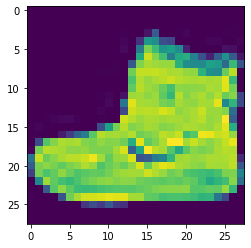

In [34]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

**Normalization**
You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

Let's now design the model.

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**:Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

**COMPILING:**

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like

In [28]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1734 - accuracy: 0.9346
Epoch 2/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1670 - accuracy: 0.9358
Epoch 3/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1649 - accuracy: 0.9381
Epoch 4/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1599 - accuracy: 0.9396
Epoch 5/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1572 - accuracy: 0.9405
Epoch 6/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1530 - accuracy: 0.9425
Epoch 7/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1494 - accuracy: 0.9440
Epoch 8/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1462 - accuracy: 0.9451
Epoch 9/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1439 - accuracy: 0.9459
Epoch 10/15
60

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [29]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.4242 - accuracy: 0.8881


[0.42423065645694735, 0.8881]

For me, that returned a accuracy of about .8881, which means it was about 88% accurate. As expected it probably would not do as well with unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.

**To explore further, try the below exercises:**

**Exercise:**

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [39]:
classifications = model.predict(test_images)

print(classifications[0])

[2.4461944e-16 2.7934470e-18 9.9476032e-15 2.4550646e-17 2.6438761e-13
 1.2579930e-08 7.4246951e-14 2.0093117e-05 4.5515854e-14 9.9997985e-01]


In [38]:
print(test_labels[1])

2


**Exercise 2:**

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [40]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.4689
Epoch 2/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.3570
Epoch 3/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.3173
Epoch 4/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.2964
Epoch 5/5
10000/10000 [==============================] - 1s 95us/sample - loss: 0.3465
[7.1254513e-09 6.6816370e-09 2.0123374e-10 2.7671143e-10 2.5267399e-09
 1.0098161e-03 5.5352896e-09 1.9960799e-03 7.1568643e-08 9.9699402e-01]
9


**Exercise 3:**

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [41]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 53s

ValueError: ignored

**Exercise 4:**

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [42]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 7:02

InvalidArgumentError: ignored

**Exercise 5:**

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There is  a significant impact.extra layers are often necessary.

In [43]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4717
Epoch 2/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3571
Epoch 3/5
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3211
Epoch 4/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2985
Epoch 5/5
10000/10000 [==============================] - 1s 90us/sample - loss: 0.3400
[6.1715546e-08 4.1883959e-09 3.1256681e-10 9.8184116e-10 1.0143427e-08
 1.7255394e-02 1.3484980e-07 5.2002696e-03 4.9302468e-08 9.7754413e-01]
9


**Exercise 6:**

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [44]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()



model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 201us/sample - loss: 2.2958
Epoch 2/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.5171
Epoch 3/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.4559
Epoch 4/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.4154
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 0.4183
[1.7093811e-08 2.0844999e-10 1.2399732e-09 4.2706683e-10 2.3944320e-09
 1.7046662e-02 6.5089893e-09 4.2849481e-02 1.7933513e-06 9.4010210e-01]
9
